In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

train_df = pd.read_csv('train3.csv')

#get equal amount of 1 and 0 targets
first_class = train_df[train_df['TARGET']==1].iloc[:2500,:]
zero_class = train_df[train_df['TARGET']==0].iloc[:2500,:]
train_df = pd.concat([zero_class, first_class])
train_df = shuffle(train_df)
train_df.drop('ID',axis=1,inplace=True)
# 1
print('train_df_shape = ',train_df.shape)

train_df_shape =  (5000, 370)


In [6]:
robust_scaler = RobustScaler()
train_df.iloc[:,:-1] = robust_scaler.fit_transform(train_df.iloc[:,:-1])

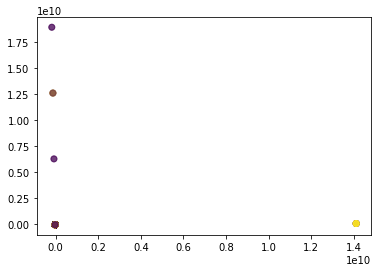

In [7]:
Y_train=train_df.iloc[:,-1]
X_train=train_df.iloc[:,:-1]

pca = PCA(n_components=2)
X_train_reduced = pca.fit_transform(X_train)

plt.scatter(X_train_reduced[:,0], X_train_reduced[:,1], alpha=0.5, c = Y_train, cmap='viridis')

In [8]:
tsne = TSNE(n_components=2, verbose=1, perplexity=10, n_iter=500)
X_train_tsne = tsne.fit_transform(X_train)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.002s...
[t-SNE] Computed neighbors for 5000 samples in 1.077s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 74.281082
[t-SNE] KL divergence after 500 iterations: 1.009490


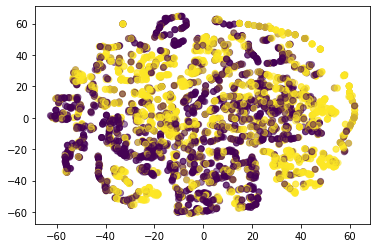

In [9]:
plt.scatter(X_train_tsne[:,0], X_train_tsne[:,1], alpha=0.5, c = Y_train, cmap='viridis')

In [10]:
tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=500)
X_train_tsne = tsne.fit_transform(X_train)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.001s...
[t-SNE] Computed neighbors for 5000 samples in 1.089s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 0.312292
[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.641922
[t-SNE] KL divergence after 500 iterations: 0.701105


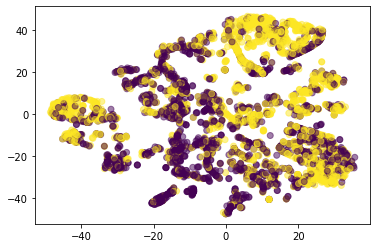

In [11]:
plt.scatter(X_train_tsne[:,0], X_train_tsne[:,1], alpha=0.5, c = Y_train, cmap='viridis')

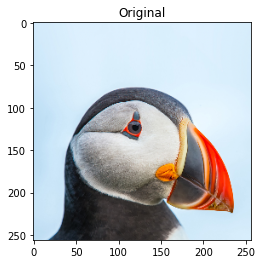

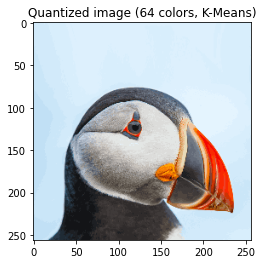

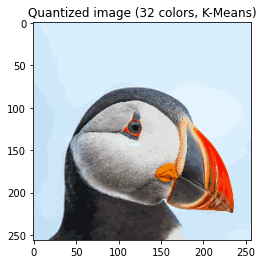

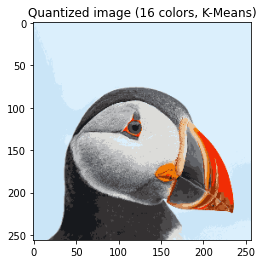

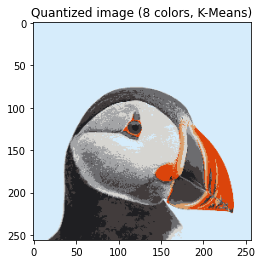

In [12]:
from sklearn.cluster import KMeans
import cv2
from sklearn.utils import shuffle

image = cv2.imread('petuh.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)/255
image = cv2.resize(image,(256,256))

plt.title(f"Original")
plt.imshow(image)
plt.show()

w, h, d  = image.shape
image_array = np.reshape(image, (w * h, d))
image_array_sample = shuffle(image_array, random_state=42, n_samples=20000)

colors = [64,32,16,8]

def recreate_image(codebook, labels, w, h):
    return codebook[labels].reshape(w, h, -1)

for color_n in colors:
    kmeans = KMeans(n_clusters=color_n, random_state=42).fit(image_array_sample)
    labels = kmeans.predict(image_array)
    plt.title(f"Quantized image ({color_n} colors, K-Means)")
    plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))
    plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: covariance is not positive-semidefinite.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: covariance is not positive-semidefinite.
  This is separate from the ipykernel package so we can avoid doing imports until


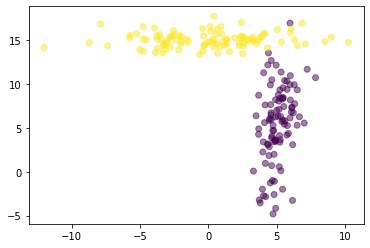

In [13]:
x1 = np.random.multivariate_normal([5, 5], cov = [[1, 10], [0, 10]], size = 100)
y1 = np.zeros(x1.shape[0])
x2 = np.random.multivariate_normal([0, 15], cov = [[0, 1], [20, 0]], size = 100)
y2 = np.ones(x2.shape[0])
x = np.concatenate((x1,x2))
y = np.concatenate((y1,y2))
plt.scatter(x[:,0], x[:,1], alpha=0.5, c = y, cmap='viridis')

In [14]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import f1_score

gm = GaussianMixture(n_components=2, random_state=42, covariance_type= 'full').fit(x)
predict_full_cov = gm.predict(x)

gm = GaussianMixture(n_components=2, random_state=42, covariance_type= 'tied').fit(x)
predict_tied_cov = gm.predict(x)

means =  [[ 0.67882614 14.62459701]
 [ 5.05595835  4.46252659]]
cov matrices =  [[ 9.91055774 -0.42683013]
 [-0.42683013  7.97857497]]
f1_score =  0.005


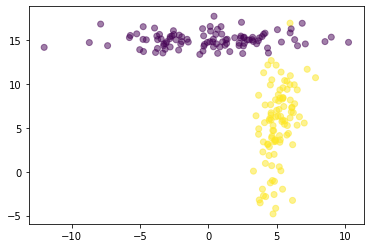

means =  [[ 0.67882614 14.62459701]
 [ 5.05595835  4.46252659]]
cov matrices =  [[ 9.91055774 -0.42683013]
 [-0.42683013  7.97857497]]
f1_score =  0.065


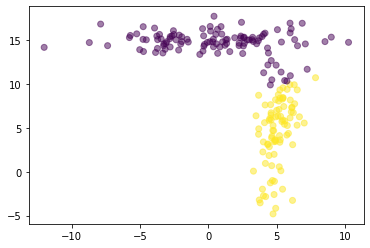

In [15]:
print('means = ',gm.means_)
print('cov matrices = ',gm.covariances_)
plt.scatter(x[:,0], x[:,1], alpha=0.5, c = predict_full_cov, cmap='viridis')
print('f1_score = ',f1_score(y, predict_full_cov, average='micro'))
plt.show()

print('means = ',gm.means_)
print('cov matrices = ',gm.covariances_)
plt.scatter(x[:,0], x[:,1], alpha=0.5, c = predict_tied_cov, cmap='viridis')
print('f1_score = ',f1_score(y, predict_tied_cov, average='micro'))
plt.show()

In [16]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from gensim.models import Word2Vec
import pandas as pd
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import re
from nltk.corpus import stopwords
import nltk
from sklearn.utils import shuffle

nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [17]:
train_df = pd.read_csv('Tweets.csv')[['airline_sentiment','text']]

In [18]:
wl = WordNetLemmatizer()
def product_to_vec(column):
    column_copy = column.copy()
    pre_text = []
    for i in column_copy.index:
        review = re.sub('[^a-zA-Z]', ' ', str(column_copy[i]))
        review = review.lower()
        review = review.split()
        review = [wl.lemmatize(word) for word in review if not word in stopwords.words('english')]
        review = ' '.join(review)
        words = review.split()
        last = " ".join(sorted(set(words), key=words.index))
        pre_text.append(last)
    
    return pre_text

train_df['text'] = product_to_vec(train_df['text'])

In [19]:
train_df["airline_sentiment"].replace({"neutral": 0, "positive": 1, "negative":2}, inplace=True)

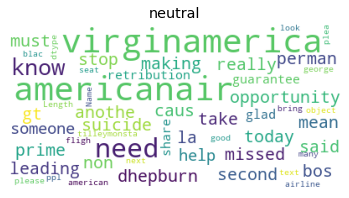

In [20]:
from wordcloud import WordCloud, STOPWORDS
import numpy as np # linear algebra
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

stoplist = set(stopwords.words("english"))

mpl.rcParams['font.size']=12                #10 
mpl.rcParams['savefig.dpi']=100             #72 
mpl.rcParams['figure.subplot.bottom']=.1 

wordcloud_zero_class = WordCloud(
                          background_color='white',
                          stopwords=stoplist,
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(train_df[train_df['airline_sentiment']==0]['text']))

fig = plt.figure(1)
plt.imshow(wordcloud_zero_class)
plt.axis('off')
plt.title('neutral')
plt.show()

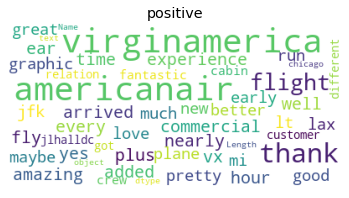

In [21]:
wordcloud_ones_class = WordCloud(
                          background_color='white',
                          stopwords=stoplist,
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(train_df[train_df['airline_sentiment']==1]['text']))

fig = plt.figure(1)
plt.imshow(wordcloud_ones_class)
plt.axis('off')
plt.title('positive')
plt.show()

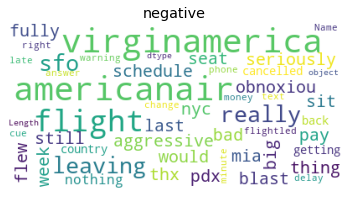

In [22]:
wordcloud_second_class = WordCloud(
                          background_color='white',
                          stopwords=stoplist,
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(train_df[train_df['airline_sentiment']==2]['text']))

fig = plt.figure(1)
plt.imshow(wordcloud_second_class)
plt.axis('off')
plt.title('negative')
plt.show()

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(norm='l2')
train_tf_idf = vectorizer.fit_transform(train_df['text'].values)
vectorizer.get_feature_names_out()

array(['aa', 'aaaand', 'aaadvantage', ..., 'zza', 'zzkqwwbjz', 'zzps'],
      dtype=object)

In [24]:
train_x = pd.DataFrame(train_tf_idf.toarray())
train_y = train_df['airline_sentiment'].reset_index()['airline_sentiment']

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

x_train, x_valid, y_train, y_valid = train_test_split(train_x, train_y, test_size=0.3, random_state=42)

In [26]:
import lightgbm as lgb
clf = lgb.LGBMClassifier()
clf.fit(x_train, y_train)

predictions = clf.predict(x_valid)

In [27]:
from sklearn.metrics import f1_score
print("f1 score = ",f1_score(y_valid, predictions, average=None))

f1 score =  [0.54894434 0.69023828 0.86148649]


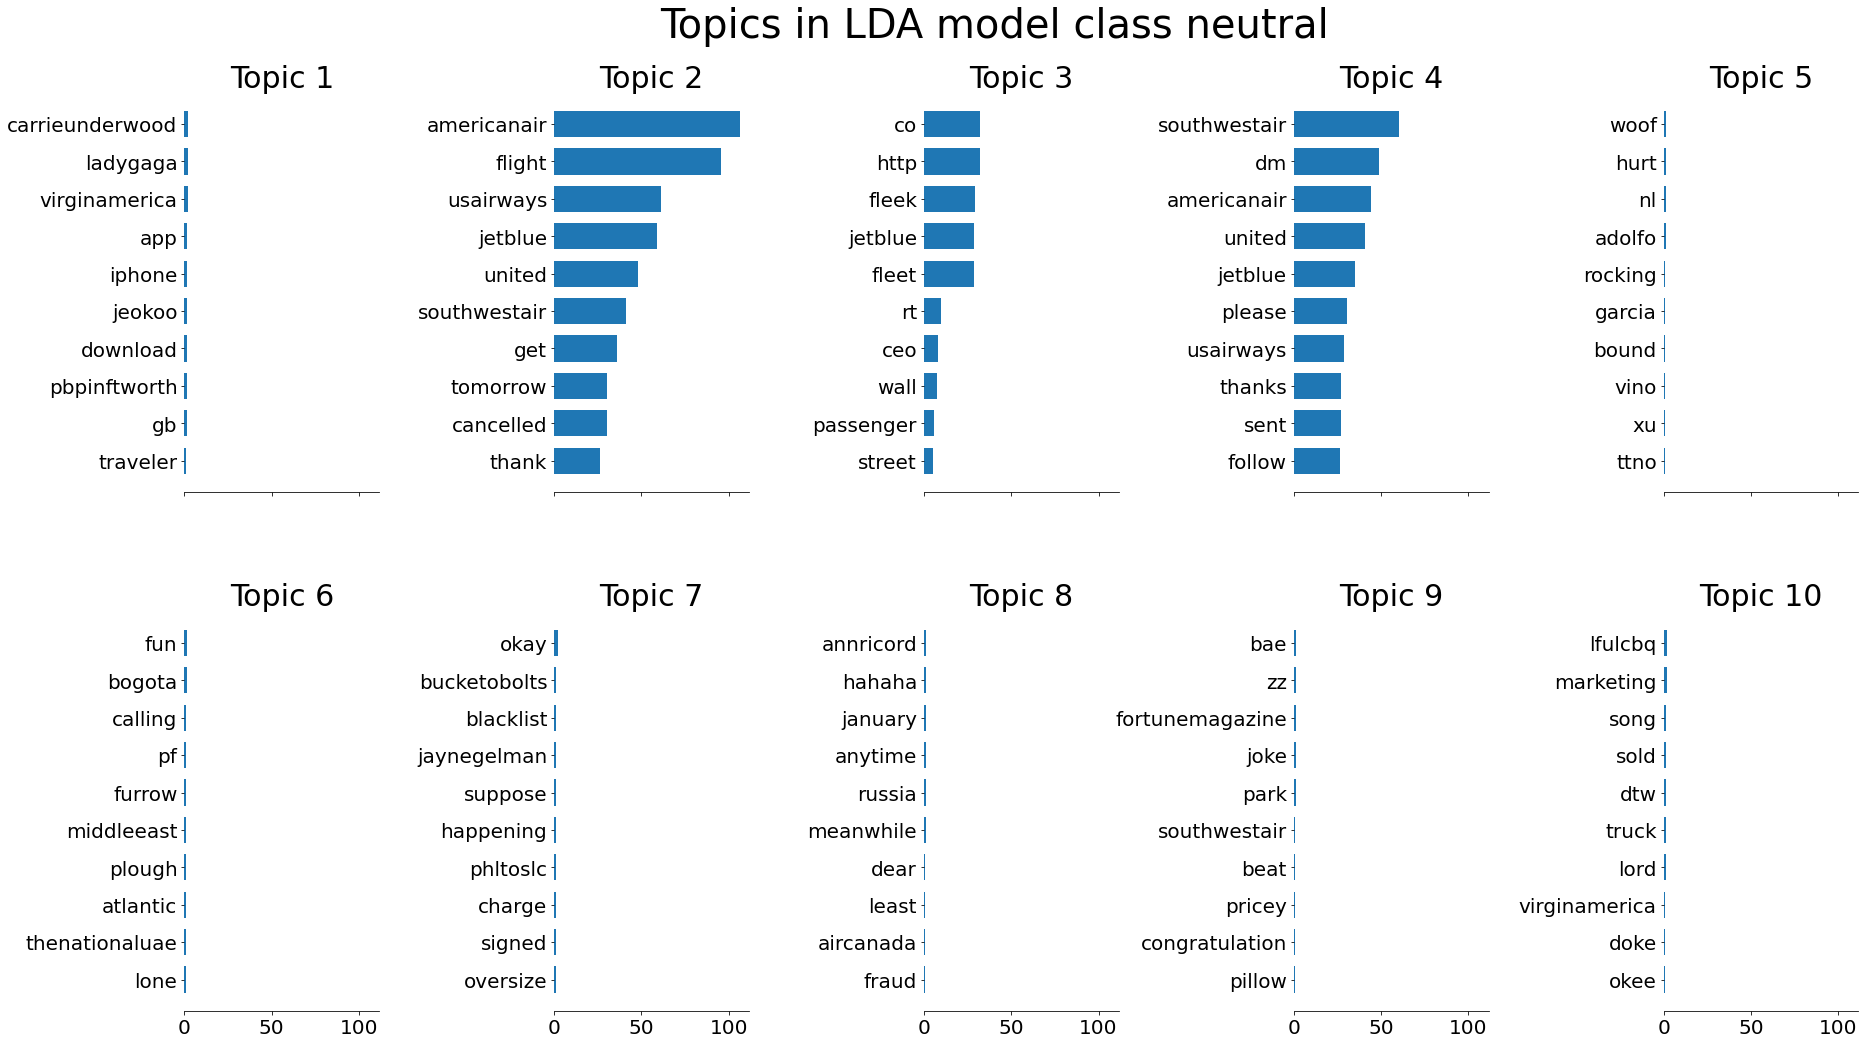

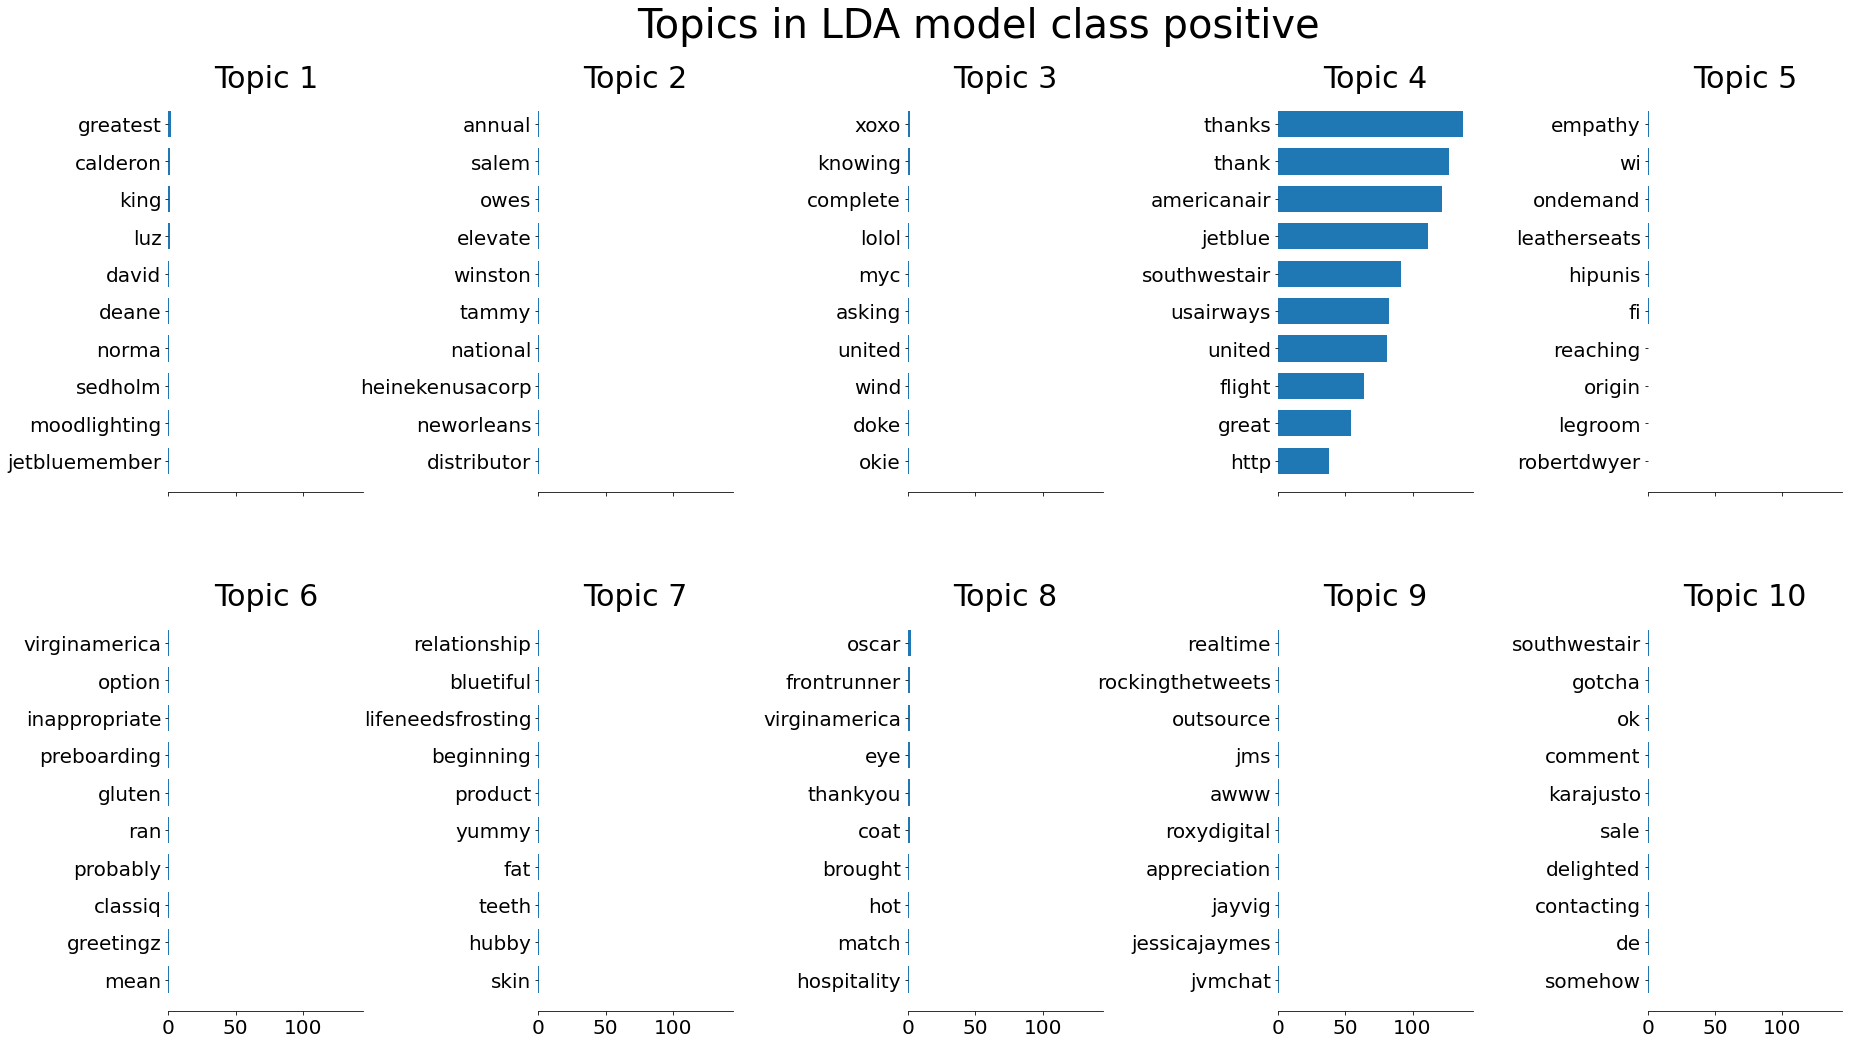

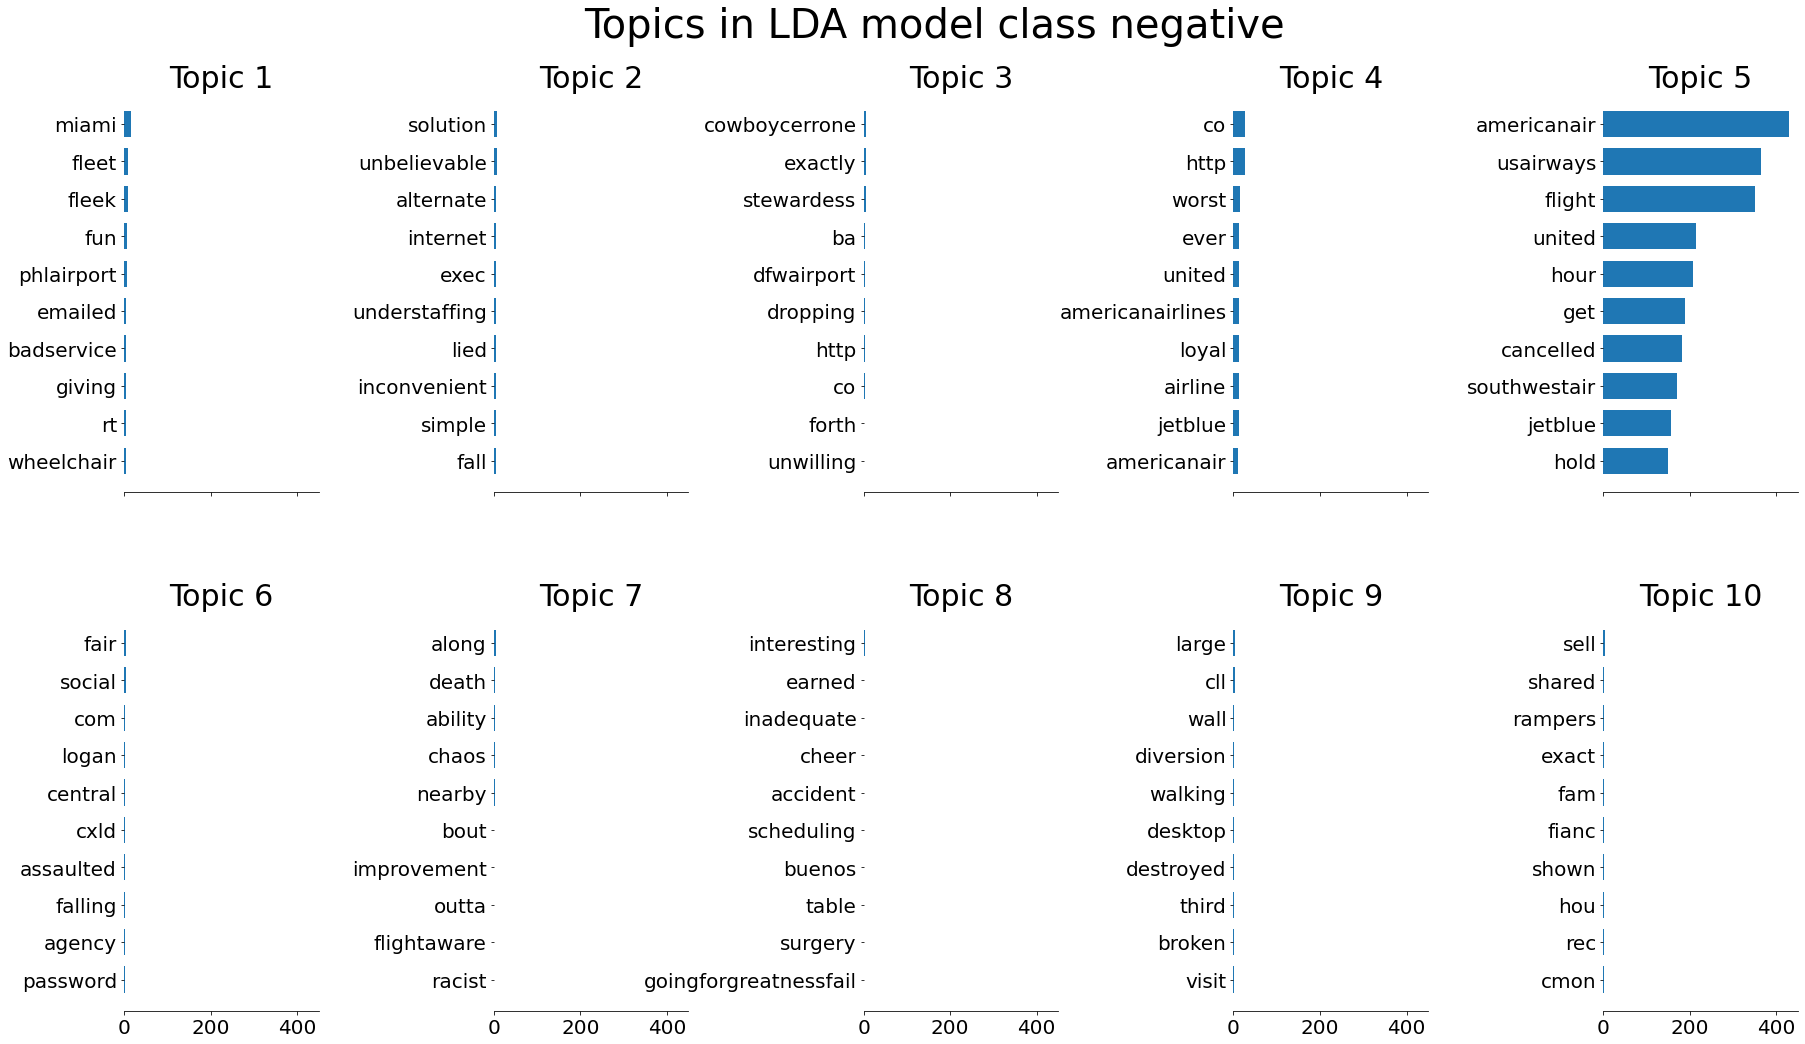

In [28]:
from sklearn.decomposition import LatentDirichletAllocation

n_top_words = 10

def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(2, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

lda = LatentDirichletAllocation(
    n_components=10,
    max_iter=5,
    learning_method="online",
    learning_offset=50.0,
    random_state=0,
)

vectorizer = TfidfVectorizer(norm='l2')
train_tf_idf_сlass0 = vectorizer.fit_transform(train_df[train_df['airline_sentiment']==0]['text'].values)

lda.fit(train_tf_idf_сlass0)

tf_feature_names = vectorizer.get_feature_names_out()
plot_top_words(lda, tf_feature_names, n_top_words, "Topics in LDA model class neutral")
plt.show()


lda = LatentDirichletAllocation(
    n_components=10,
    max_iter=5,
    learning_method="online",
    learning_offset=50.0,
    random_state=0,
)

vectorizer = TfidfVectorizer(norm='l2')
train_tf_idf_сlass1 = vectorizer.fit_transform(train_df[train_df['airline_sentiment']==1]['text'].values)

lda.fit(train_tf_idf_сlass1)

tf_feature_names = vectorizer.get_feature_names_out()
plot_top_words(lda, tf_feature_names, n_top_words, "Topics in LDA model class positive")
plt.show()



lda = LatentDirichletAllocation(
    n_components=10,
    max_iter=5,
    learning_method="online",
    learning_offset=50.0,
    random_state=0,
)

vectorizer = TfidfVectorizer(norm='l2')
train_tf_idf_сlass2 = vectorizer.fit_transform(train_df[train_df['airline_sentiment']==2]['text'].values)

lda.fit(train_tf_idf_сlass2)

tf_feature_names = vectorizer.get_feature_names_out()
plot_top_words(lda, tf_feature_names, n_top_words, "Topics in LDA model class negative")
plt.show()